### モジュール，データフレームの読み込み

In [1]:
import collections
import datetime
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### データの確認と編集

In [2]:
df = pd.read_csv("../data/Moji_Tide_2011-2021/csv/9010_2011-2021.csv")
print(df.columns)

Index(['0時の潮高値(cm)', '1時の潮高値(cm)', '2時の潮高値(cm)', '3時の潮高値(cm)', '4時の潮高値(cm)',
       '5時の潮高値(cm)', '6時の潮高値(cm)', '7時の潮高値(cm)', '8時の潮高値(cm)', '9時の潮高値(cm)',
       '10時の潮高値(cm)', '11時の潮高値(cm)', '9010(門司の観測値コード)', '20xx年', 'xx月', 'xx日',
       '1(午前)/2(午後)'],
      dtype='object')


In [3]:
df = df.drop("9010(門司の観測値コード)", axis=1)
df

,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),9時の潮高値(cm),10時の潮高値(cm),11時の潮高値(cm),20xx年,xx月,xx日,1(午前)/2(午後)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,1,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,2,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,2,2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,84.0,112.0,141.0,160.0,170.0,176.0,174.0,160.0,133.0,102.0,71.0,47.0,21,12,29,2
8032,39.0,50.0,76.0,111.0,145.0,165.0,168.0,164.0,152.0,128.0,98.0,76.0,21,12,30,1
8033,65.0,72.0,96.0,127.0,157.0,177.0,180.0,169.0,148.0,115.0,81.0,47.0,21,12,30,2
8034,20.0,12.0,24.0,57.0,103.0,144.0,163.0,167.0,165.0,152.0,123.0,89.0,21,12,31,1


### 年月日の一元化

In [4]:
date_cols = ["20xx年", "xx月", "xx日"]
df["年月日"] = [
    datetime.date(
        2000 + int(df["20xx年"][i]),
        int(df["xx月"][i]),
        int(df["xx日"][i])
    )for i in range(len(df))
]
df = df.drop(date_cols, axis=1)
df

,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),9時の潮高値(cm),10時の潮高値(cm),11時の潮高値(cm),1(午前)/2(午後),年月日
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2011-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2011-01-01
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2011-01-02
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2011-01-02
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2011-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,84.0,112.0,141.0,160.0,170.0,176.0,174.0,160.0,133.0,102.0,71.0,47.0,2,2021-12-29
8032,39.0,50.0,76.0,111.0,145.0,165.0,168.0,164.0,152.0,128.0,98.0,76.0,1,2021-12-30
8033,65.0,72.0,96.0,127.0,157.0,177.0,180.0,169.0,148.0,115.0,81.0,47.0,2,2021-12-30
8034,20.0,12.0,24.0,57.0,103.0,144.0,163.0,167.0,165.0,152.0,123.0,89.0,1,2021-12-31


### 全て欠損している日の削除

In [5]:
date_keys = []
for i in range(len(df)):
    if df["年月日"][i] not in date_keys:
        date_keys.append(df["年月日"][i])

am_cols = [f"{i}時の潮高値(cm)" for i in range(12)]
pm_cols = [f"{i}時の潮高値(cm)" for i in range(12,24)]

#午前のデータと午後のデータに分けたDataFrameを作成
new_df_list = []
for i in range(len(date_keys)):
    tmp = df[df["年月日"] == date_keys[i]].reset_index().drop("index", axis=1)
    am_data = [item for item in tmp[tmp["1(午前)/2(午後)"] == 1][am_cols].values[0]]
    pm_data = [item for item in tmp[tmp["1(午前)/2(午後)"] == 2][am_cols].values[0]]
    new_df_list.append(am_data + pm_data)

#年月日情報のみのDataFrameと,24時間分のデータを集めたDataFrameを結合
time_cols = am_cols + pm_cols
df = pd.concat([pd.DataFrame(date_keys, columns=["年月日"]), pd.DataFrame(new_df_list, columns=time_cols)], axis=1)
df

,年月日,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),...,14時の潮高値(cm),15時の潮高値(cm),16時の潮高値(cm),17時の潮高値(cm),18時の潮高値(cm),19時の潮高値(cm),20時の潮高値(cm),21時の潮高値(cm),22時の潮高値(cm),23時の潮高値(cm)
0,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2021-12-27,127.0,140.0,145.0,139.0,124.0,104.0,81.0,58.0,41.0,...,154.0,154.0,150.0,140.0,122.0,96.0,73.0,63.0,66.0,78.0
4014,2021-12-28,99.0,122.0,141.0,150.0,146.0,133.0,114.0,91.0,73.0,...,148.0,154.0,158.0,158.0,145.0,122.0,96.0,72.0,58.0,58.0
4015,2021-12-29,70.0,92.0,121.0,145.0,155.0,154.0,147.0,135.0,113.0,...,141.0,160.0,170.0,176.0,174.0,160.0,133.0,102.0,71.0,47.0
4016,2021-12-30,39.0,50.0,76.0,111.0,145.0,165.0,168.0,164.0,152.0,...,96.0,127.0,157.0,177.0,180.0,169.0,148.0,115.0,81.0,47.0


In [6]:
#年月日を除く全てのデータがNaNであるものを削除
date_dropped_df = df.drop("年月日", axis=1)
index = list(date_dropped_df.dropna(how="all").index)

new_df = df.iloc[index].reset_index().drop("index", axis=1)
new_df

,年月日,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),...,14時の潮高値(cm),15時の潮高値(cm),16時の潮高値(cm),17時の潮高値(cm),18時の潮高値(cm),19時の潮高値(cm),20時の潮高値(cm),21時の潮高値(cm),22時の潮高値(cm),23時の潮高値(cm)
0,2011-04-01,85.0,57.0,43.0,53.0,86.0,127.0,160.0,179.0,187.0,...,43.0,47.0,76.0,119.0,157.0,182.0,195.0,193.0,175.0,142.0
1,2011-04-02,103.0,68.0,44.0,40.0,62.0,105.0,148.0,179.0,194.0,...,37.0,27.0,44.0,85.0,133.0,169.0,190.0,197.0,188.0,160.0
2,2011-04-03,121.0,80.0,48.0,33.0,42.0,78.0,125.0,165.0,189.0,...,41.0,21.0,25.0,57.0,107.0,151.0,182.0,198.0,198.0,178.0
3,2011-04-04,142.0,98.0,59.0,35.0,34.0,59.0,103.0,148.0,180.0,...,48.0,17.0,7.0,27.0,73.0,125.0,164.0,187.0,195.0,186.0
4,2011-04-05,158.0,117.0,74.0,41.0,30.0,46.0,86.0,132.0,169.0,...,62.0,25.0,4.0,10.0,47.0,101.0,147.0,178.0,194.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,2021-12-27,127.0,140.0,145.0,139.0,124.0,104.0,81.0,58.0,41.0,...,154.0,154.0,150.0,140.0,122.0,96.0,73.0,63.0,66.0,78.0
3924,2021-12-28,99.0,122.0,141.0,150.0,146.0,133.0,114.0,91.0,73.0,...,148.0,154.0,158.0,158.0,145.0,122.0,96.0,72.0,58.0,58.0
3925,2021-12-29,70.0,92.0,121.0,145.0,155.0,154.0,147.0,135.0,113.0,...,141.0,160.0,170.0,176.0,174.0,160.0,133.0,102.0,71.0,47.0
3926,2021-12-30,39.0,50.0,76.0,111.0,145.0,165.0,168.0,164.0,152.0,...,96.0,127.0,157.0,177.0,180.0,169.0,148.0,115.0,81.0,47.0


In [7]:
nan_index = []
for i in range(len(new_df)):
    if new_df.loc[i].hasnans:
        nan_index.append(i)
        
new_df.iloc[nan_index]

,年月日,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),...,14時の潮高値(cm),15時の潮高値(cm),16時の潮高値(cm),17時の潮高値(cm),18時の潮高値(cm),19時の潮高値(cm),20時の潮高値(cm),21時の潮高値(cm),22時の潮高値(cm),23時の潮高値(cm)
243,2011-11-30,211.0,193.0,163.0,126.0,91.0,63.0,45.0,46.0,77.0,...,NaN,NaN,154.0,121.0,102.0,102.0,126.0,148.0,174.0,196.0
244,2011-12-01,191.0,184.0,167.0,142.0,113.0,85.0,63.0,50.0,54.0,...,NaN,168.0,154.0,127.0,110.0,99.0,100.0,112.0,133.0,155.0
622,2012-12-13,71.0,23.0,-13.0,-21.0,5.0,60.0,117.0,158.0,192.0,...,66.0,46.0,65.0,107.0,159.0,199.0,219.0,226.0,212.0,170.0
628,2012-12-19,198.0,196.0,179.0,150.0,117.0,87.0,63.0,48.0,49.0,...,NaN,NaN,NaN,128.0,97.0,82.0,79.0,89.0,109.0,135.0
985,2013-12-11,120.0,148.0,173.0,185.0,185.0,176.0,160.0,139.0,117.0,...,NaN,183.0,185.0,184.0,177.0,158.0,130.0,102.0,76.0,64.0
1347,2014-12-08,156.0,106.0,58.0,15.0,4.0,17.0,63.0,124.0,177.0,...,NaN,NaN,NaN,76.0,109.0,155.0,194.0,207.0,214.0,205.0
1348,2014-12-09,172.0,128.0,82.0,41.0,8.0,6.0,28.0,83.0,137.0,...,NaN,NaN,NaN,NaN,82.0,118.0,165.0,195.0,208.0,206.0
2139,2017-02-07,50.0,61.0,89.0,124.0,153.0,168.0,176.0,177.0,168.0,...,NaN,NaN,173.0,188.0,196.0,190.0,172.0,145.0,112.0,77.0
2197,2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.0,153.0,177.0,196.0,201.0,191.0,171.0,145.0,119.0,95.0
2813,2018-12-13,193.0,178.0,150.0,120.0,91.0,64.0,45.0,48.0,71.0,...,176.0,160.0,139.0,116.0,98.0,94.0,107.0,129.0,152.0,172.0


In [8]:
for index in nan_index:
    print(new_df.iloc[index]["年月日"], ":")
    print("\t", end="")
    for col in time_cols:
        if str(new_df.iloc[index][col]) == "nan":
            print(col[:-8], end=' ')
    print("\n")

2011-11-30 :
	10時 11時 12時 13時 14時 15時 

2011-12-01 :
	10時 11時 12時 13時 14時 

2012-12-13 :
	10時 11時 12時 13時 

2012-12-19 :
	10時 11時 12時 13時 14時 15時 16時 

2013-12-11 :
	10時 11時 12時 13時 14時 

2014-12-08 :
	9時 10時 11時 12時 13時 14時 15時 16時 

2014-12-09 :
	9時 10時 11時 12時 13時 14時 15時 16時 17時 

2017-02-07 :
	10時 11時 12時 13時 14時 15時 

2017-04-06 :
	0時 1時 2時 3時 4時 5時 6時 7時 8時 9時 

2018-12-13 :
	10時 11時 12時 13時 

2018-12-25 :
	10時 11時 12時 13時 

2020-12-18 :
	5時 6時 7時 8時 9時 10時 11時 12時 13時 14時 15時 16時 17時 18時 19時 

2020-12-28 :
	5時 6時 7時 8時 9時 10時 11時 12時 13時 14時 15時 16時 17時 18時 



### フルにデータが使える期間の抽出

In [9]:
start = new_df[new_df["年月日"] == datetime.date(2015, 1, 1)].index[0]
end = new_df[new_df["年月日"] == datetime.date(2017, 1, 1)].index[0]

print(new_df["年月日"][start])
print(new_df["年月日"][end - 1])

full_df = new_df.iloc[start:end].reset_index().drop("index", axis=1)

2015-01-01
2016-12-31


### 1日の中の変位の可視化

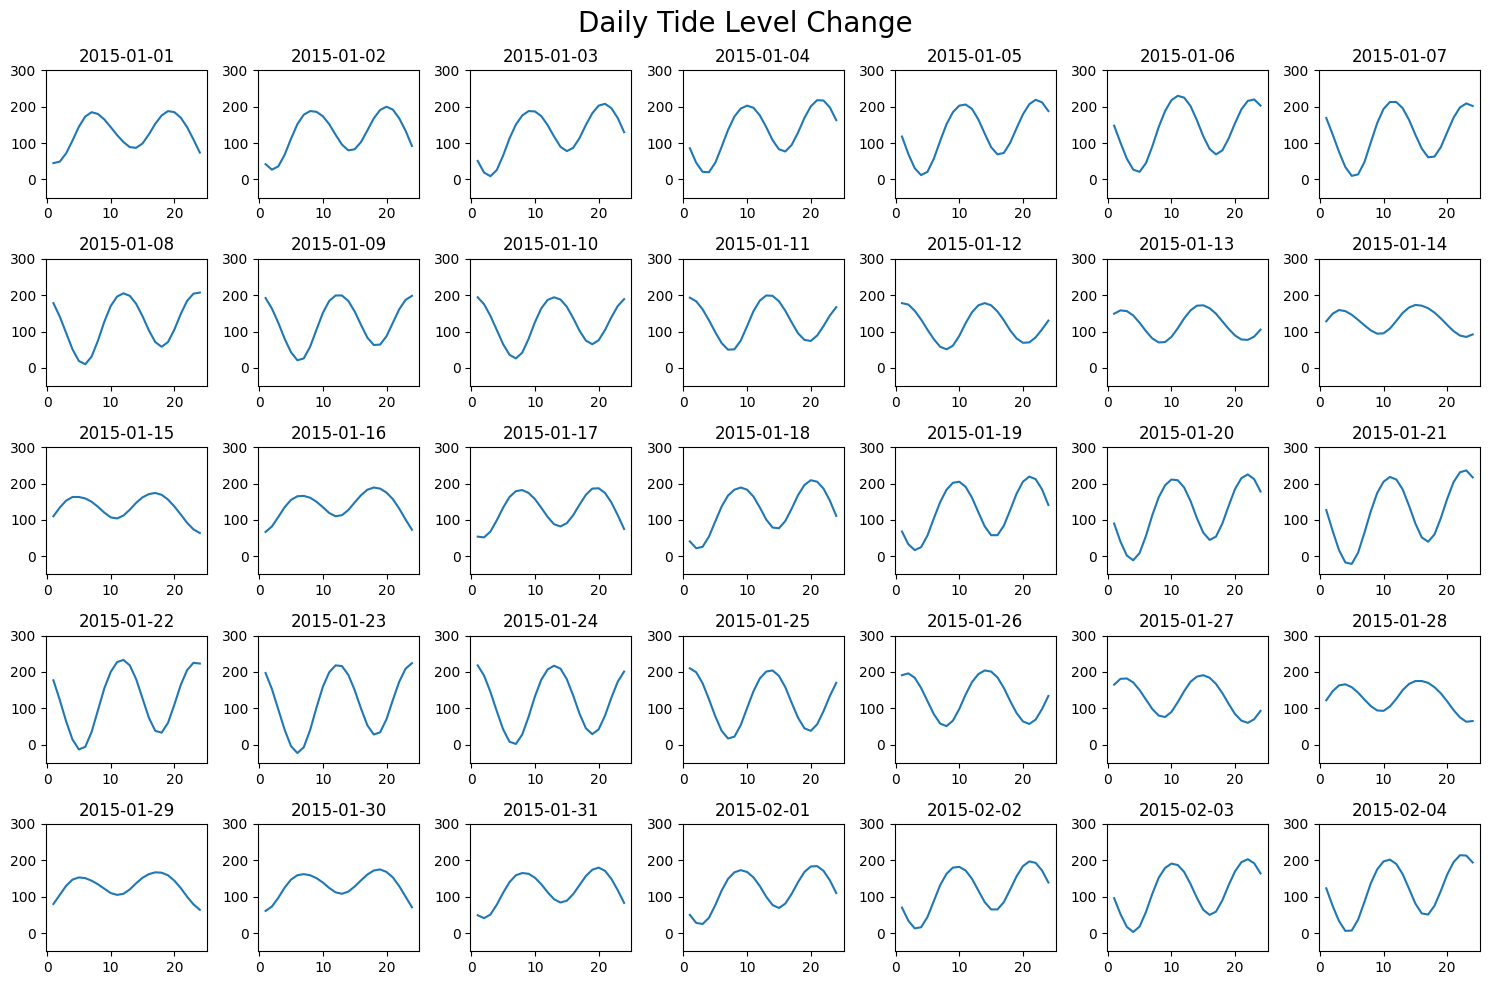

In [10]:
x = list(range(1,25))
fig, ax = plt.subplots(5,7, figsize=(15,10))

for i in range(5):
    for j in range(7):
        cnt = 7*i+j

        ax[i, j].plot(x,full_df.iloc[cnt,x])
        ax[i, j].set_ylim(-50,300)
        ax[i, j].set_title(str(full_df["年月日"][cnt]))
 
plt.suptitle("Daily Tide Level Change", fontsize=20)
plt.tight_layout()
plt.show()

冒頭35日分のデータを見ると、いずれの日においても極大値と極小値が1日に2回ずつ訪れていると予想できる。また、毎日約1時間ずつ、波が遅れていく。

### 2年間の潮位の変化の傾向分析

In [11]:
full_df["最大値"] = full_df.drop("年月日", axis=1).max(axis=1)
full_df["最小値"] = full_df.drop("年月日", axis=1).min(axis=1)

full_df[["最大値", "最小値"]]

,最大値,最小値
0,188.0,45.0
1,200.0,27.0
2,208.0,9.0
3,218.0,20.0
4,219.0,12.0
...,...,...
726,220.0,57.0
727,213.0,25.0
728,215.0,14.0
729,214.0,3.0


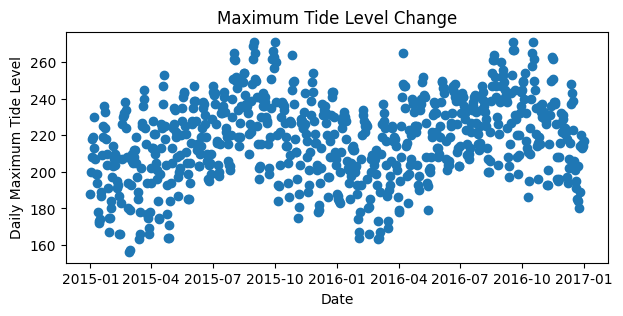

In [12]:
fig = plt.figure(figsize=(7,3))

plt.scatter(x=full_df["年月日"], y=full_df["最大値"])
plt.title("Maximum Tide Level Change")
plt.xlabel("Date")
plt.ylabel("Daily Maximum Tide Level")

plt.show()

2015〜2016の2年間の、日毎の最大潮位の推移。どちらの年でも、潮位は8月から10月にかけて高く、2月から3月にかけて低くなっていることが分かる。

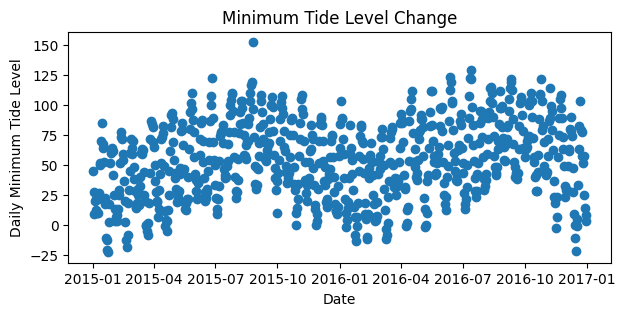

In [13]:
fig = plt.figure(figsize=(7,3))

plt.scatter(x=full_df["年月日"], y=full_df["最小値"])
plt.title("Minimum Tide Level Change")
plt.xlabel("Date")
plt.ylabel("Daily Minimum Tide Level")

plt.show()

最小値についてみても大体同じ.

## 欠損値補完

### 統計的情報を用いた補完

In [14]:
full_df

,年月日,0時の潮高値(cm),1時の潮高値(cm),2時の潮高値(cm),3時の潮高値(cm),4時の潮高値(cm),5時の潮高値(cm),6時の潮高値(cm),7時の潮高値(cm),8時の潮高値(cm),...,16時の潮高値(cm),17時の潮高値(cm),18時の潮高値(cm),19時の潮高値(cm),20時の潮高値(cm),21時の潮高値(cm),22時の潮高値(cm),23時の潮高値(cm),最大値,最小値
0,2015-01-01,45.0,49.0,72.0,107.0,145.0,173.0,185.0,180.0,165.0,...,153.0,176.0,188.0,185.0,170.0,144.0,110.0,74.0,188.0,45.0
1,2015-01-02,42.0,27.0,36.0,68.0,112.0,152.0,178.0,188.0,186.0,...,135.0,168.0,191.0,200.0,192.0,168.0,134.0,92.0,200.0,27.0
2,2015-01-03,51.0,19.0,9.0,26.0,66.0,113.0,151.0,176.0,188.0,...,114.0,150.0,182.0,203.0,208.0,196.0,169.0,130.0,208.0,9.0
3,2015-01-04,86.0,46.0,21.0,20.0,46.0,90.0,136.0,173.0,195.0,...,95.0,129.0,169.0,201.0,218.0,217.0,198.0,163.0,218.0,20.0
4,2015-01-05,118.0,70.0,31.0,12.0,21.0,57.0,106.0,152.0,185.0,...,73.0,101.0,141.0,179.0,207.0,219.0,212.0,188.0,219.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2016-12-27,97.0,68.0,57.0,69.0,99.0,141.0,176.0,195.0,203.0,...,107.0,141.0,180.0,211.0,220.0,204.0,171.0,132.0,220.0,57.0
727,2016-12-28,94.0,58.0,30.0,25.0,47.0,91.0,142.0,177.0,193.0,...,87.0,125.0,170.0,201.0,213.0,212.0,193.0,155.0,213.0,25.0
728,2016-12-29,110.0,69.0,33.0,14.0,25.0,64.0,119.0,164.0,189.0,...,68.0,94.0,139.0,182.0,206.0,215.0,206.0,176.0,215.0,14.0
729,2016-12-30,133.0,88.0,46.0,13.0,3.0,27.0,79.0,136.0,175.0,...,60.0,76.0,117.0,164.0,197.0,212.0,214.0,199.0,214.0,3.0


In [15]:
table_df = full_df.drop(["年月日", "最大値", "最小値"], axis=1)
cols = list(table_df.columns)

#潮位データのみを全て格納するリストを作成
tl = []
for i in range(len(table_df)):
    tmp = table_df.iloc[i]
    tl += list(tmp)

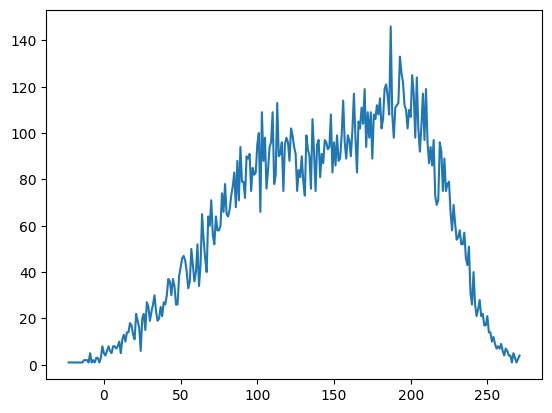

In [16]:
#各値と、潮位がその値をとる回数とを組にしたタプルを作成し、リストcountsに格納
counts = sorted(dict(collections.Counter(tl)).items())
keys = [counts[i][0] for i in range(len(counts))]
values = [counts[i][1] for i in range(len(counts))]

plt.plot(keys, values)
plt.show()

各値に対し、潮位がその値をとる回数をプロットした。だいたい170〜190ごろに値が最も集まっていることが読み取れる。

#### フルにデータが使える期間を用いた実験

In [17]:
#実験用データを用意
start = new_df[new_df["年月日"] == datetime.date(2017, 5, 1)].index[0]
end = new_df[new_df["年月日"] == datetime.date(2017, 6, 1)].index[0]
print(new_df["年月日"][start])
print(new_df["年月日"][end - 1])

ex_df = new_df.iloc[start:end].reset_index().drop(["index", "年月日"], axis=1)

#潮位データのみを全て格納するリストを作成
ex_tl = []
for i in range(len(ex_df)):
    tmp = ex_df.iloc[i]
    ex_tl += list(tmp)

2017-05-01
2017-05-31


In [18]:
#潮位のみのテーブルデータを作成(学習用)
full_table = pd.DataFrame(tl, columns=["潮位(cm)"])
#(実験用)
ex_table = pd.DataFrame(ex_tl, columns=["潮位(cm)"])

In [19]:
#差分のデータフレームを作成
d_tl_df = full_table["潮位(cm)"][1:].reset_index() - full_table["潮位(cm)"][:-1].reset_index()
d_tl = list(d_tl_df["潮位(cm)"])

In [25]:
def completion(ex_table, tl, nan_num, diff=False, seed_val=42):
    # 欠損値とする index を random で選択(nan_nam で複数選択可)
    random.seed(seed_val)
    nan_index = sorted(random.sample(range(1, len(ex_table)), nan_num))

    # 標本空間からサンプリング
    cmp = random.sample(tl, nan_num)

    # 実験用のデータフレームより欠損後のデータフレームを作成
    nan_ex_table = ex_table.replace(
        ex_table["潮位(cm)"].iloc[nan_index].values, [float("nan") for i in range(len(nan_index))]
    )

    if diff: # 差分を取る場合(方法①)
        for i in range(nan_num):
            nan_ex_table["潮位(cm)"].iloc[nan_index[i]] = nan_ex_table["潮位(cm)"].iloc[nan_index[i] - 1] + cmp[i]
    else: # 生の値を取る場合(方法②)
        for i in range(nan_num):
            nan_ex_table["潮位(cm)"].iloc[nan_index[i]] = cmp[i]
    
    return ex_table, nan_ex_table, nan_index

本来のデータ: 88.0
補完後のデータ: 152.0


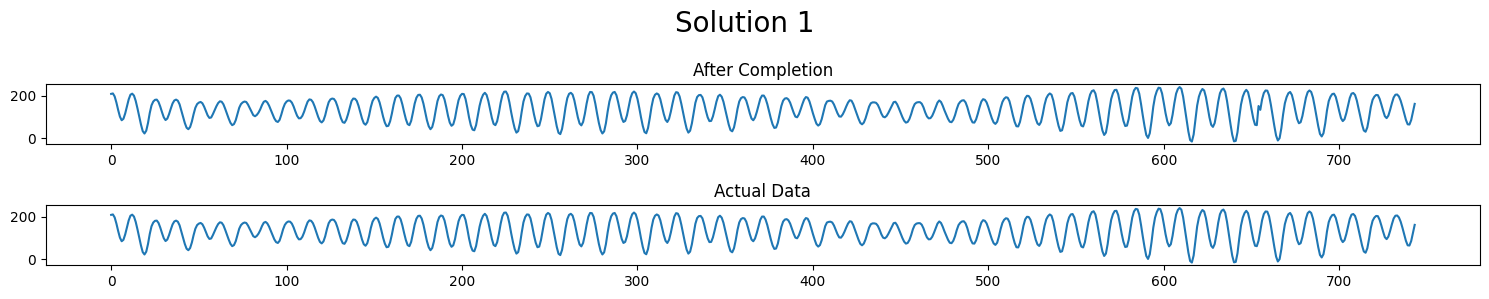

In [21]:
#方法①を実行
r_e, trans_table = completion_1(ex_table)
print("本来のデータ:", r_e[0])
print("補完後のデータ:", r_e[1])

#グラフを表示
fig, ax = plt.subplots(2,figsize=(15,3))

ax[0].plot(trans_table)
ax[0].set_title("After Completion")
ax[1].plot(ex_table)
ax[1].set_title("Actual Data")

plt.suptitle("Solution 1", fontsize=20)
plt.tight_layout()
plt.show()

650付近で、本来のデータとのずれが生じている。

次に、データの差分をとり、その中からランダムで選んだものを欠損値の前データに加える方法を試す。

本来のデータ: 134.0
補完後のデータ: 50.0


/var/folders/yy/h4ndzppd11l1g6sl_d1_jymw0000gq/T/ipykernel_38627/2022788687.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  miss_2 = trans_table_2.iloc[miss_index][0]
/var/folders/yy/h4ndzppd11l1g6sl_d1_jymw0000gq/T/ipykernel_38627/2022788687.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cover_2 = trans_table_2.iloc[miss_index-1][0] + d_cover


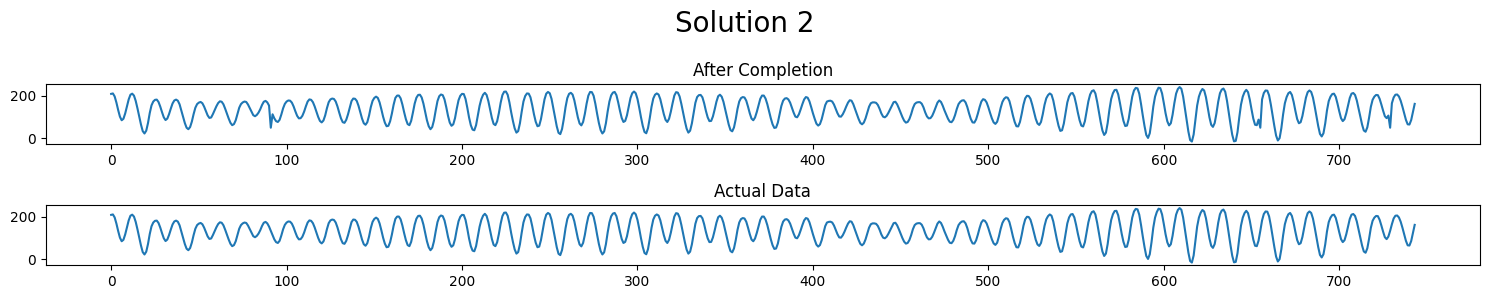

In [22]:
#方法②を実行
r_e_2, trans_table_2 = completion_2(ex_table)
print("本来のデータ:", r_e_2[0])
print("補完後のデータ:", r_e_2[1])

#グラフを表示
fig, ax = plt.subplots(2,figsize=(15,3))

ax[0].plot(trans_table_2)
ax[0].set_title("After Completion")
ax[1].plot(ex_table)
ax[1].set_title("Actual Data")

plt.suptitle("Solution 2", fontsize=20)
plt.tight_layout()
plt.show()

やはり、本来のデータとのずれが生じている。

最後に、2つの補完方法の精度を比較する。

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([63.5, 63.6, 63.7, 63.8, 63.9, 64. , 64.1, 64.2, 64.3, 64.4, 64.5]),
 <BarContainer object of 10 artists>)

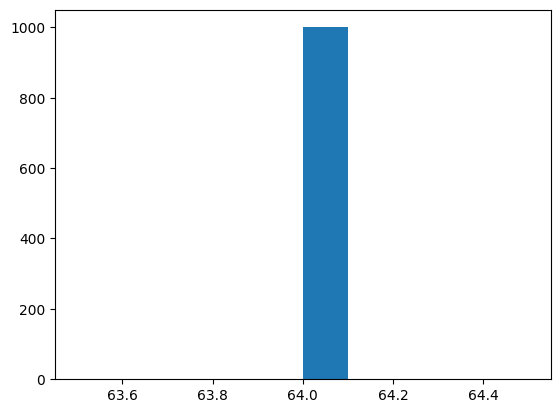

In [23]:
#方法①
error_list_1 = []
for i in range(10**3):
    r_e_set = completion_1(ex_table)[0]
    error_list_1.append(abs(r_e_set[1]-r_e_set[0]))

plt.hist(error_list_1)

/var/folders/yy/h4ndzppd11l1g6sl_d1_jymw0000gq/T/ipykernel_38627/2022788687.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  miss_2 = trans_table_2.iloc[miss_index][0]
/var/folders/yy/h4ndzppd11l1g6sl_d1_jymw0000gq/T/ipykernel_38627/2022788687.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cover_2 = trans_table_2.iloc[miss_index-1][0] + d_cover


(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([83.5, 83.6, 83.7, 83.8, 83.9, 84. , 84.1, 84.2, 84.3, 84.4, 84.5]),
 <BarContainer object of 10 artists>)

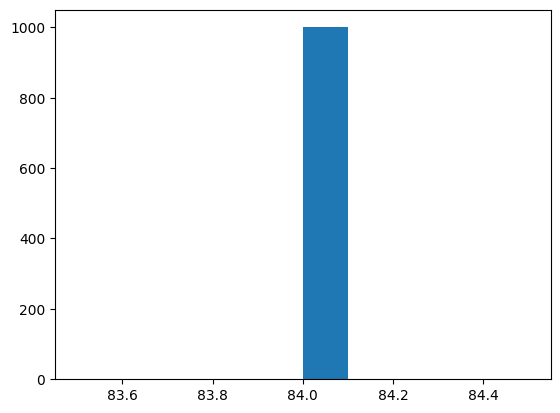

In [24]:
#方法②
error_list_2 = []
for i in range(10**3):
    r_e_set_2 = completion_2(ex_table)[0]
    error_list_2.append(abs(r_e_set_2[1]-r_e_set_2[0]))

plt.hist(error_list_2)

何度か実行してみると、分布の裾の長さなどから、後者の方法がより精度が高いと考えられる（手動の反復実験なので、不確かではあるが）。